In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np, h5py

In [160]:
import os
print(os.getcwd())
print(os.listdir())

/Users/yumiao/Documents/Works/github/GhostHunter
['data_base1', 'read_test.ipynb', 'README.md', 'GH-tutorial.slides.html', '20200315_IO+ANA.ipynb', '.ipynb_checkpoints', '.git']


In [161]:
import h5py
with h5py.File("./data_base1/ab-0.h5") as fi:
    print(list(fi.keys()))

['PETruth', 'ParticleTruth', 'Waveform']


In [162]:
import pandas as pd
PETruth = pd.read_hdf("./data_base1/ab-0.h5", "PETruth").set_index("EventID")
PETruth.head()


,ChannelID,PETime
EventID,,
1,0,257
1,2,282
1,3,267
1,3,274
1,5,269


In [163]:
ParticleTruth = pd.read_hdf("./data_base1/ab-0.h5", "ParticleTruth").set_index("EventID")
ParticleTruth.head()

,x,y,z,E,Alpha
EventID,,,,,
1,0.0,0.0,0.0,8.9,1
2,0.0,0.0,0.0,8.9,1
3,0.0,0.0,0.0,8.9,1
4,0.0,0.0,0.0,8.9,1
5,0.0,0.0,0.0,1.0,0


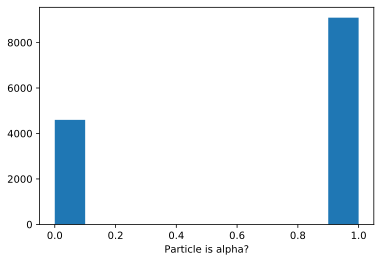

In [164]:
plt.hist(ParticleTruth['Alpha']); plt.xlabel("Particle is alpha?")
plt.show()

In [165]:
alpha_label = ParticleTruth.query("Alpha==1")
alpha_label.head()

,x,y,z,E,Alpha
EventID,,,,,
1,0.0,0.0,0.0,8.9,1
2,0.0,0.0,0.0,8.9,1
3,0.0,0.0,0.0,8.9,1
4,0.0,0.0,0.0,8.9,1
9,0.0,0.0,0.0,8.9,1


In [166]:
beta_label = ParticleTruth.query("Alpha==0")
beta_label.head()

,x,y,z,E,Alpha
EventID,,,,,
5,0.0,0.0,0.0,1.0,0
6,0.0,0.0,0.0,1.0,0
7,0.0,0.0,0.0,1.0,0
8,0.0,0.0,0.0,1.0,0
10,0.0,0.0,0.0,1.0,0


In [167]:
# 从 PETruth 取出对应的Event
alpha_data = PETruth.loc[alpha_label.index]
alpha_data.head()

,ChannelID,PETime
EventID,,
1,0,257
1,2,282
1,3,267
1,3,274
1,5,269


In [168]:
beta_data = PETruth.loc[beta_label.index]
beta_data.head()

,ChannelID,PETime
EventID,,
5,0,332
5,1,282
5,1,311
5,1,333
5,2,281


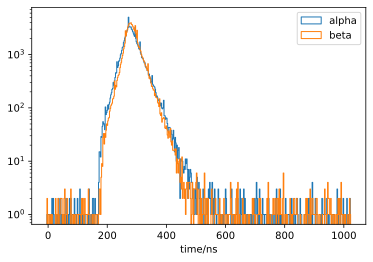

In [36]:
plt.clf()
plt.hist(alpha_data['PETime'][:100000],bins=500, histtype="step", label="alpha"); plt.yscale('log'); 
plt.hist(beta_data["PETime"][:100000], bins=500, histtype="step", label="beta"); plt.legend()
#plt.xlim(150,250)
plt.xlabel("time/ns"); plt.show()

In [37]:
print(alpha_label.index[10], beta_label.index[1])

22 6


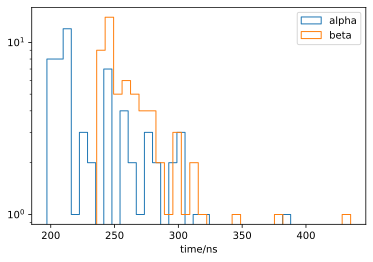

In [38]:
alpha_event = PETruth.loc[22]
beta_event = PETruth.loc[6]
plt.clf()
plt.hist(alpha_event['PETime'],bins=30, histtype="step", label="alpha"); plt.yscale('log'); 
plt.hist(beta_event["PETime"], bins=30, histtype="step", label="beta"); plt.legend()
plt.xlabel("time/ns"); plt.show()

In [30]:
import numpy as np
print(np.std(alpha_event['PETime']), np.std(beta_event['PETime']))

31.743466870375155 35.351316178546384


In [39]:
PETruth.groupby("EventID").count().head()

,ChannelID,PETime
EventID,,
1,71,71
2,69,69
3,67,67
4,58,58
5,73,73


In [58]:
alpha_event = PETruth.loc[22]
cont, edge = np.histogram(alpha_event['PETime'], bins=1000, range=(0,1000))
print(np.argmax(cont))


206


## Events Alignment

In [213]:
alpha_label.shape

(9093, 5)

In [110]:
## loop all alpha events
alpha_align_time = []
for i in range(9093):
    alpha_id = alpha_label.index[i]
    alpha_event = PETruth.loc[alpha_id]
    cont, edge = np.histogram(alpha_event['PETime'], bins=1000, range=(0,1000))
    alpha_align_time.append((np.argmax(cont)*2+1)/2.-200.)
alpha_align_time = np.array(alpha_align_time)

In [120]:
## align 500 events:
no_align_alpha = []; align_alpha = [];
for i in range(500):
    alpha_id = alpha_label.index[i]
    alpha_event = PETruth.loc[alpha_id]
    for j in range(alpha_event['PETime'].values.shape[0]):
        no_align_alpha.append(alpha_event['PETime'].values[j])
        align_alpha.append(alpha_event['PETime'].values[j]-alpha_align_time[i])

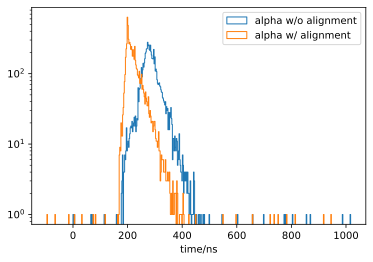

In [112]:
plt.hist(no_align_alpha,bins=500, histtype="step", label="alpha w/o alignment"); plt.yscale('log'); 
plt.hist(align_alpha, bins=500, histtype="step", label="alpha w/ alignment"); plt.legend();plt.xlabel("time/ns");

In [149]:
beta_label.shape

(4598, 5)

In [113]:
## loop all beta events
beta_align_time = []
for i in range(4598):
    beta_id = beta_label.index[i]
    beta_event = PETruth.loc[beta_id]
    cont, edge = np.histogram(beta_event['PETime'], bins=1000, range=(0,1000))

    beta_align_time.append((np.argmax(cont)*2+1)/2.-200)
beta_align_time = np.array(beta_align_time)

In [121]:
## align 100 events:
no_align_beta = []; align_beta = [];
for i in range(500):
    beta_id = beta_label.index[i]
    beta_event = PETruth.loc[beta_id]
    for j in range(beta_event['PETime'].values.shape[0]):
        no_align_beta.append(beta_event['PETime'].values[j])
        align_beta.append(beta_event['PETime'].values[j]-beta_align_time[i])

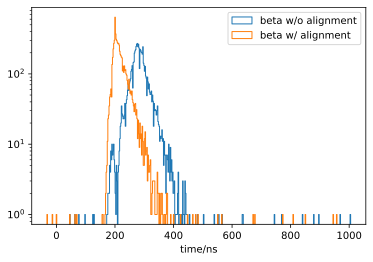

In [115]:
plt.hist(no_align_beta,bins=500, histtype="step", label="beta w/o alignment"); plt.yscale('log'); 
plt.hist(align_beta, bins=500, histtype="step", label="beta w/ alignment"); plt.legend();plt.xlabel("time/ns");

(160, 400)

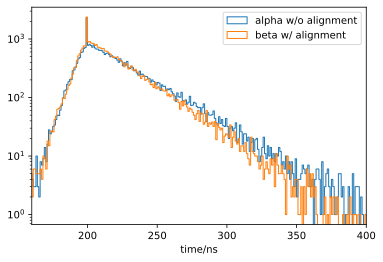

In [122]:
plt.hist(align_alpha,bins=1000,range=(0,1000), histtype="step", label="alpha w/o alignment"); plt.yscale('log'); 
plt.hist(align_beta, bins=1000, range=(0,1000), histtype="step", label="beta w/ alignment"); plt.legend();
plt.xlabel("time/ns"); plt.xlim(160, 400)

In [123]:
tail_ratio_alpha = []; tail_ratio_beta = [];
for i in range(200,300,1):
    tmp_ratio_alpha = 0.; tmp_ratio_beta = 0.;
    for j in align_alpha:
        if j>=i:
            tmp_ratio_alpha += 1;
    tmp_ratio_alpha /= float(len(align_alpha)); tail_ratio_alpha.append(tmp_ratio_alpha);
    for k in align_beta:
        if k>=i:
            tmp_ratio_beta += 1;
    tmp_ratio_beta /= float(len(align_beta)); tail_ratio_beta.append(tmp_ratio_beta);

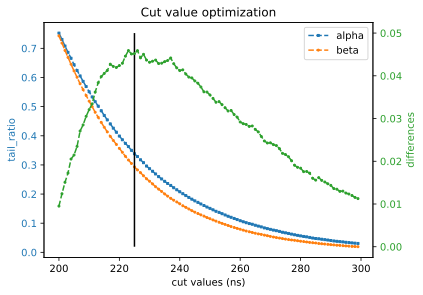

In [215]:
#plt.plot(np.arange(200,300,1), tail_ratio_alpha, "s--", ms=2, label="alpha");
#plt.plot(np.arange(200,300,1), tail_ratio_beta, "o--", ms=2, label='beta');
#plt.plot(np.arange(200,300,1), np.array(tail_ratio_alpha)-np.array(tail_ratio_beta), "o--", ms=2, label='diff');

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('cut values (ns)')
ax1.set_ylabel('tail_ratio', color=color)
ax1.plot(np.arange(200,300,1), tail_ratio_alpha, "s--", ms=2, label="alpha");
ax1.plot(np.arange(200,300,1), tail_ratio_beta, "o--", ms=2, label='beta');
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('differences', color=color)  # we already handled the x-label with ax1
ax2.plot(np.arange(200,300,1), np.array(tail_ratio_alpha)-np.array(tail_ratio_beta), 
         "o--", ms=2, label='diff', color=color);
plt.vlines(225, 0, 0.05)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Cut value optimization")
plt.show()


In [135]:
## Preliminary selection : 225ns,  alpha: 0.3500489, beta: 0.3049

In [192]:
alpha_correct_ratio = [];
beta_correct_ratio = [];

In [206]:
## test on training dataset: alpha
## align 1000 events:

cut = 0.360;

correct_num = 0;
for i in range(1000):
    align_alpha_test = []; tmp_tail = 0.;
    alpha_id = alpha_label.index[1000+i]
    alpha_event = PETruth.loc[alpha_id]
    for j in range(alpha_event['PETime'].values.shape[0]):
        align_alpha_test.append(alpha_event['PETime'].values[j]-alpha_align_time[i+1000])
    for k in range(len(align_alpha_test)):
        if align_alpha_test[k] >= 225:
            tmp_tail += 1;
    tmp_tail /= len(align_alpha_test);
    if tmp_tail >= cut:
        correct_num += 1
alpha_correct_ratio.append(correct_num/1000.)
print("total correct ratio for alpha: ", correct_num/1000)

correct_num = 0;
for i in range(1000):
    align_beta_test = []; tmp_tail = 0.;
    beta_id = beta_label.index[1000+i]
    beta_event = PETruth.loc[beta_id]
    for j in range(beta_event['PETime'].values.shape[0]):
        align_beta_test.append(beta_event['PETime'].values[j]-beta_align_time[i+1000])
    for k in range(len(align_beta_test)):
        if align_beta_test[k] >= 225:
            tmp_tail += 1;
    tmp_tail /= len(align_beta_test);
    if tmp_tail < cut:
        correct_num += 1
beta_correct_ratio.append(correct_num/1000.)
print("total correct ratio for beta: ", correct_num/1000)

total correct ratio for alpha:  0.453
total correct ratio for beta:  0.798


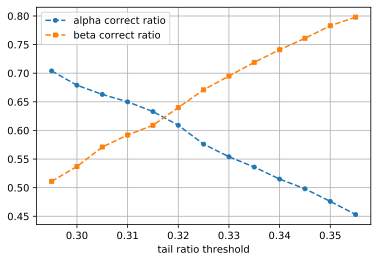

In [212]:
## test on training dataset: beta
## align 1000 events:
cut_value = np.arange(0.295, 0.360, 0.005)
plt.plot(cut_value, alpha_correct_ratio, "o--", ms=4, label="alpha correct ratio")
plt.plot(cut_value, beta_correct_ratio, "s--", ms=4, label="beta correct ratio")
plt.legend(); plt.xlabel("tail ratio threshold"); plt.grid(True)